Carregar arquivo de erros TCP ao longo do tempo, aplicar media do últimos x intervalos de tempo e comparar com a média atual.

*Desevolvido no Google Colab.

In [1]:
# Importando bibliotecas
from google.colab import drive 
# used for manipulating directory paths
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Abrindo drive
drive.mount("/content/gdrive")
%cd /content/gdrive/MyDrive/Colab Notebooks/
%ls

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks
Estatisticas/                           Parque.ipynb
LerErrosTCP_pcapPYSHARK.ipynb           PCAPs/
LerErrosTCP_pcapSCAPY.ipynb             testes_iniciais.ipynb
MediaJanelaDeslizanteAnomaliaTCP.ipynb  Untitled0.ipynb


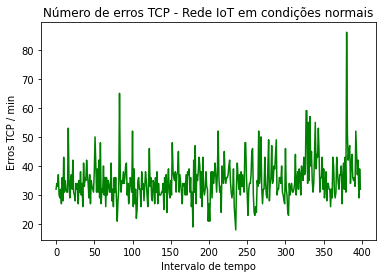

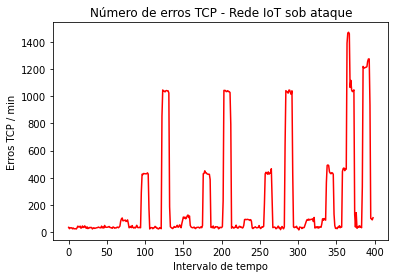

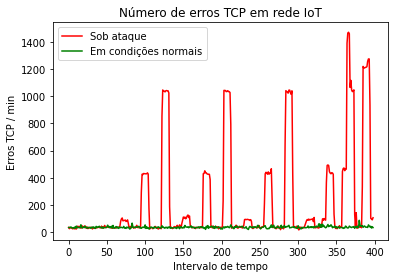

In [3]:
# Carregando dados
dados_ataque = np.loadtxt(os.path.join('Estatisticas','tcp_errors_ataque.txt'), delimiter=',',skiprows=1)
dados_normal = np.loadtxt(os.path.join('Estatisticas','tcp_errors_normal.txt'), delimiter=',',skiprows=1)

# Recorte para melhor visualização dos dados
errosTCP_a = dados_ataque[400:799, 1]
errosTCP_n = dados_normal[400:799, 1]

# Condicoes normais
plt.plot(errosTCP_n, color = 'g')
plt.title('Número de erros TCP - Rede IoT em condições normais')
plt.xlabel('Intervalo de tempo')
plt.ylabel('Erros TCP / min')
plt.show()

# Sob ataque
plt.plot(errosTCP_a, color = 'r')
plt.title('Número de erros TCP - Rede IoT sob ataque')
plt.xlabel('Intervalo de tempo')
plt.ylabel('Erros TCP / min')
plt.show()

# Unindo linhas
plt.plot(errosTCP_a, color = 'r', label = "Sob ataque")
plt.plot(errosTCP_n, color = 'g', label = "Em condições normais")
plt.title('Número de erros TCP em rede IoT')
plt.xlabel('Intervalo de tempo')
plt.ylabel('Erros TCP / min')
plt.legend()
plt.show()


Total de ataques identificados: 30


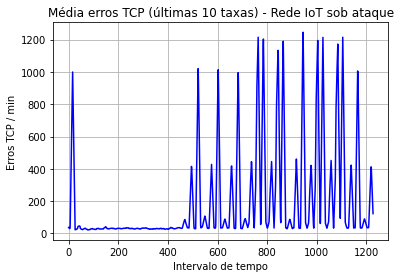

In [4]:
# Carregando dados completos
tempo, erros_TCP = dados_ataque[:, 0], dados_ataque[:, 1]
#tempo, erros_TCP = dados_normal[:, 0], dados_normal[:, 1]

def JanelaDeslizante(dados, tamanho):
  print (dados[:5])
  print (tamanho)

#JanelaDeslizante(erros_TCP, 10)

v = np.lib.stride_tricks.sliding_window_view(erros_TCP,10)

media_erros = []
cont_ataque = 0
sob_ataque = 0

#-1000 temp testes
#for i in range(len(v)-1000):
for i in range(len(v)):
  media_erros.append(v[i].mean())
  if i<2: #sem base para comparacao
    #print ("menor q 2")
    pass
  else:
    #print("---")
    #print("antepenultima",v[i-2].mean())
    antpen_media=v[i-2].mean()
    #print("penultima",v[i-1].mean())
    pen_media=v[i-1].mean()
    #print("media atual",v[i].mean())
    media_atual=v[i].mean()
    #print(antpen_media,pen_media,media_atual)
    if (media_atual>pen_media*1.1) and (pen_media>antpen_media*1.1) and sob_ataque == 0:
      #print ("Crescimento de 10% nas ultimas 3 medicoes")
      cont_ataque += 1
      sob_ataque = 1
    if (antpen_media>pen_media) and (pen_media>media_atual):
      #print ("Media em queda, desarma sob ataque")
      sob_ataque = 0

print ("Total de ataques identificados:",cont_ataque)
# crescimento de 10% nos erros das ultimas 3 medias
# sob-ataque: ignora novos crescimentos - mesmo ataque
# desarma sob-ataque com queda nas ultimas 3 medias.


# Sob ataque
plt.plot(media_erros, color = 'b')
plt.title('Média erros TCP (últimas 10 taxas) - Rede IoT sob ataque')
plt.xlabel('Intervalo de tempo')
plt.ylabel('Erros TCP / min')
plt.grid()
plt.show()